# Credit Card Approval Prediction

**Problem Statment**

A Bank wants to automate the Credit Card eligibility process based on customer detail provided while filling online application form & Credit history of customer.

They have given a problem to identify the customers segments which are eligible for Credit Card approval, so that they can specifically target these customers.

The decision of approving a credit card or loan is majorly dependent on the personal and financial background of the applicant. Factors like, age, gender, income, employment status, credit history and other attributes all carry weight in the approval decision. Credit analysis involves the measure to investigate the probability of a third-party to pay back the loan to the bank on time and predict its default characteristic. Analysis focus on recognizing, assessing, and reducing the financial or other risks that could lead to loss involved in the transaction. 

There are two basic risks: one is a business loss that results from not approving the good candidate, and the other is the financial loss that results from by approving the candidate who is at bad risk. It is very important to manage credit risk and handle challenges efficiently for credit decision as it can have adverse effects on credit management. Therefore, evaluation of credit approval is significant before jumping to any granting decision.


### Content & Explanation

###### File - Application Record.csv

|Feature name|Explanation|
|:--|:--|
|ID|Client number|
|CODE_GENDER|Gender|
|FLAG_OWN_CAR|Is there a car|
|FLAG_OWN_REALTY|Is there a property|
|CNT_CHILDREN|Number of children|
|AMT_INCOME_TOTAL|Annual income|
|NAME_INCOME_TYPE|Income category|
|NAME_EDUCATION_TYPE|Education level|
|NAME_FAMILY_STATUS|Marital status|
|NAME_HOUSING_TYPE|Way of living|
|DAYS_BIRTH|Birthday|
|DAYS_EMPLOYED|Start date of employment|
|FLAG_MOBIL|Is there a mobile phone|
|FLAG_WORK_PHONE|Is there a work phone|
|FLAG_PHONE|Is there a phone|
|FLAG_EMAIL|Is there an email|
|OCCUPATION_TYPE|Occupation|
|CNT_FAM_MEMBERS|Family size|


* Note -                                                                                                                       
DAYS_BIRTH ---> Count backwards from current day (0), -1 means yesterday                                                       
DAYS_EMPLOYED ---> Count backwards from current day(0). If positive, it means the person currently unemployed.

###### File - Credit Record.csv

|Feature name|Explanation|
|:--|:--|
|ID|Client number|
|MONTHS_BALANCE|Record month|
|STATUS|Status|

ID: The joining key between application data and credit status data

MONTHS_BALANCE: The month of the extracted data is the starting point with 0 is the current month, -1 is the previous month, and so on

STATUS: Status of the credit card account.

- 0: 1-29 days past due
- 1: 30-59 days past due
- 2: 60-89 days overdue
- 3: 90-119 days overdue
- 4: 120-149 days overdue
- 5: Overdue or bad debts, write-offs for more than 150 days
- C: paid off that month
- X: No loan for the month

We may want to see the accounts by the MONTHS_BALANCE. Ideally, it would have been useful to get the application date or month. And the status value for each month post credit card open month. So, the credit behavior of the applicants across the application months can be compared.

### Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
app_df = pd.read_csv("application_record.csv")
app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
app_df.shape

(438557, 18)

In [4]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
credit_df = pd.read_csv("credit_record.csv") 
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
credit_df.shape

(1048575, 3)

In [7]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


### Exploratory Data Analysis (EDA)

#### On File - Application Record.csv

In [8]:
app_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [9]:
app_df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

We've uncovered some issues that will affect the performance of our machine learning model(s) if they go unchanged:

Our dataset contains both numeric and non-numeric data (specifically data that are of float64, int64 and object types). Specifically, the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.
The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000. Apart from these, we can get useful statistical information (like mean, max, and min) about the features that have numerical values.
Finally, the dataset has missing values, which we'll take care of in this task. The missing values in the dataset are labeled with '?', which can be seen in the last cell's output.

In [10]:
# dropping occupation type which has many null values
app_df.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [11]:
# Checking duplicates in 'ID' column
len(app_df['ID']) - len(app_df['ID'].unique())

47

In [12]:
# Dropping duplicate entries from ID column
app_df = app_df.drop_duplicates('ID', keep='last') 

In [13]:
# Checking Non-Numerical Columns
cat_columns = app_df.columns[(app_df.dtypes =='object').values].tolist()
cat_columns

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [14]:
# Checking Numerical Columns
app_df.columns[(app_df.dtypes !='object').values].tolist()

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS']

In [15]:
# Checking unique values from Categorical Columns

for i in app_df.columns[(app_df.dtypes =='object').values].tolist():
    print(i,'\n')
    print(app_df[i].value_counts())
    print('-----------------------------------------------')

CODE_GENDER 

F    294412
M    144098
Name: CODE_GENDER, dtype: int64
-----------------------------------------------
FLAG_OWN_CAR 

N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64
-----------------------------------------------
FLAG_OWN_REALTY 

Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64
-----------------------------------------------
NAME_INCOME_TYPE 

Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64
-----------------------------------------------
NAME_EDUCATION_TYPE 

Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64
-----------------------------------------------
NAME_FAMILY_STATUS 

Married                 299798
Single / not ma

In [16]:
# Checking unique values from Numerical Columns

In [17]:
app_df['CNT_CHILDREN'].value_counts()

0     304038
1      88518
2      39879
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64

In [18]:
# Checking Min , Max values from 'DAYS_BIRTH' column
print('Min DAYS_BIRTH :', app_df['DAYS_BIRTH'].min(),'\nMax DAYS_BIRTH :', app_df['DAYS_BIRTH'].max())

Min DAYS_BIRTH : -25201 
Max DAYS_BIRTH : -7489


In [19]:
# Converting 'DAYS_BIRTH' values from Day to Years
app_df['DAYS_BIRTH'] = round(app_df['DAYS_BIRTH']/-365,0)
app_df.rename(columns={'DAYS_BIRTH':'AGE_YEARS'}, inplace=True)

In [20]:
# Checking unique values greater than 0
app_df[app_df['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()

array([365243])

In [21]:
# As mentioned in document, if 'DAYS_EMPLOYED' is positive no, it means person currently unemployed, hence replacing it with 0
app_df['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

In [22]:
# Converting 'DAYS_EMPLOYED' values from Day to Years
app_df['DAYS_EMPLOYED'] = abs(round(app_df['DAYS_EMPLOYED']/-365,0))
app_df.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True)   

In [23]:
app_df['FLAG_MOBIL'].value_counts()

1    438510
Name: FLAG_MOBIL, dtype: int64

In [24]:
# As all the values in column are 1, hence dropping column
app_df.drop('FLAG_MOBIL', axis=1, inplace=True)

In [25]:
app_df['FLAG_WORK_PHONE'].value_counts()

0    348118
1     90392
Name: FLAG_WORK_PHONE, dtype: int64

In [26]:
# This column only contains 0 & 1 values for Mobile no submitted, hence dropping column
app_df.drop('FLAG_WORK_PHONE', axis=1, inplace=True)

In [27]:
app_df['FLAG_PHONE'].value_counts()

0    312323
1    126187
Name: FLAG_PHONE, dtype: int64

In [28]:
# This column only contains 0 & 1 values for Phone no submitted, hence dropping column
app_df.drop('FLAG_PHONE', axis=1, inplace=True)

In [29]:
app_df['FLAG_EMAIL'].value_counts()

0    391062
1     47448
Name: FLAG_EMAIL, dtype: int64

In [30]:
# This column only contains 0 & 1 values for Email submitted, hence dropping column
app_df.drop('FLAG_EMAIL', axis=1, inplace=True)

In [31]:
app_df['CNT_FAM_MEMBERS'].value_counts()

2.0     233867
1.0      84483
3.0      77119
4.0      37351
5.0       5081
6.0        459
7.0        124
9.0          9
11.0         5
8.0          4
14.0         4
15.0         3
20.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [32]:
app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0


# Visualization

<AxesSubplot:xlabel='CNT_CHILDREN'>

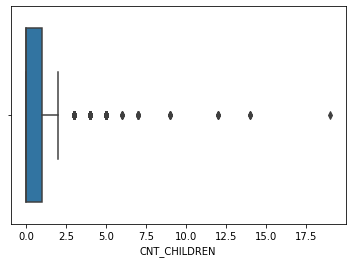

In [33]:
#create plot to detect outliers
sns.boxplot(app_df['CNT_CHILDREN'])

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

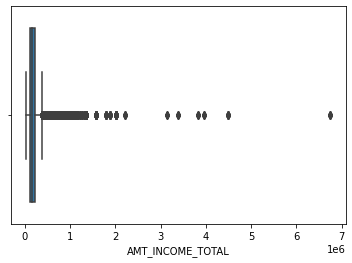

In [34]:
sns.boxplot(app_df['AMT_INCOME_TOTAL'])

<AxesSubplot:xlabel='AGE_YEARS'>

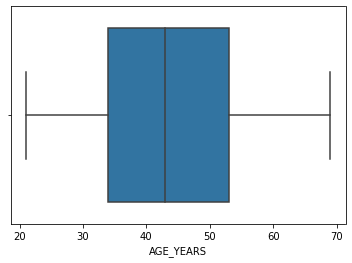

In [35]:
sns.boxplot(app_df['AGE_YEARS'])

<AxesSubplot:xlabel='YEARS_EMPLOYED'>

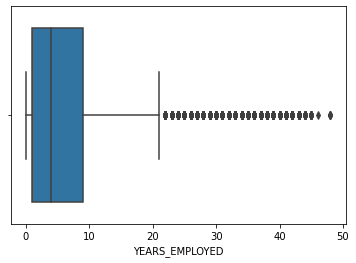

In [36]:
sns.boxplot(app_df['YEARS_EMPLOYED'])

<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

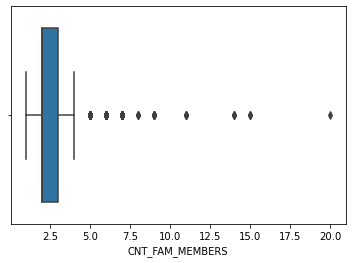

In [37]:
sns.boxplot(app_df['CNT_FAM_MEMBERS'])

### Removing Outliers

In [38]:
high_bound = app_df['CNT_CHILDREN'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['CNT_CHILDREN'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 4.0
low_bound : 0.0


In [39]:
app_df = app_df[(app_df['CNT_CHILDREN']>=low_bound) & (app_df['CNT_CHILDREN']<=high_bound)]

In [40]:
high_bound = app_df['AMT_INCOME_TOTAL'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['AMT_INCOME_TOTAL'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 990000.0
low_bound : 36000.0


In [41]:
app_df = app_df[(app_df['AMT_INCOME_TOTAL']>=low_bound) & (app_df['AMT_INCOME_TOTAL']<=high_bound)]

In [42]:
high_bound = app_df['YEARS_EMPLOYED'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['YEARS_EMPLOYED'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 40.0
low_bound : 0.0


In [43]:
app_df = app_df[(app_df['YEARS_EMPLOYED']>=low_bound) & (app_df['YEARS_EMPLOYED']<=high_bound)]

In [44]:
high_bound = app_df['CNT_FAM_MEMBERS'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['CNT_FAM_MEMBERS'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 6.0
low_bound : 1.0


In [45]:
app_df = app_df[(app_df['CNT_FAM_MEMBERS']>=low_bound) & (app_df['CNT_FAM_MEMBERS']<=high_bound)]

In [46]:
app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0


#### On File - Credit Record.csv

In [47]:
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [48]:
app_df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE_YEARS              0
YEARS_EMPLOYED         0
CNT_FAM_MEMBERS        0
dtype: int64

In [49]:
credit_df['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [50]:
# categorizing 'STATUS' column to binary classification   0 : Good Client and 1 : bad client
credit_df['STATUS'].replace(['C', 'X'],0, inplace=True)

In [51]:
credit_df['STATUS'].replace(['2','3','4','5'],1, inplace=True)

In [52]:
credit_df['STATUS'] = credit_df['STATUS'].astype('int')

In [53]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   ID              1048575 non-null  int64
 1   MONTHS_BALANCE  1048575 non-null  int64
 2   STATUS          1048575 non-null  int64
dtypes: int64(3)
memory usage: 24.0 MB


In [54]:
credit_df['STATUS'].value_counts(normalize=True)*100

0    98.646353
1     1.353647
Name: STATUS, dtype: float64

In [55]:
credit_df_trans = credit_df.groupby('ID').agg(max).reset_index()

In [56]:
credit_df_trans.drop('MONTHS_BALANCE', axis=1, inplace=True)
credit_df_trans.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [57]:
credit_df_trans['STATUS'].value_counts(normalize=True)*100

0    88.365771
1    11.634229
Name: STATUS, dtype: float64

# Merging Dataframes

In [58]:
# merging the two datasets based on 'ID'
final_df = pd.merge(app_df, credit_df_trans, on='ID', how='inner')
final_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0


In [59]:
final_df.shape

(36326, 14)

In [60]:
final_df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE_YEARS              0
YEARS_EMPLOYED         0
CNT_FAM_MEMBERS        0
STATUS                 0
dtype: int64

In [61]:
final_df['STATUS'].value_counts(normalize=True)*100

0    88.234323
1    11.765677
Name: STATUS, dtype: float64

# Visualization

In [62]:
final_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0


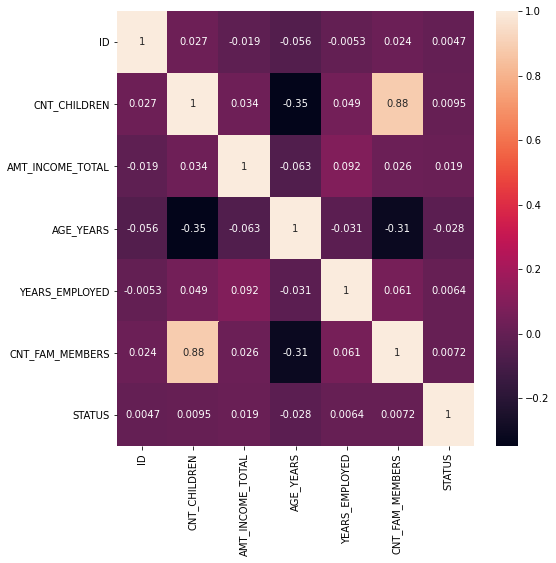

In [63]:
# This graph shows that, there is no column (Feature) which is highly co-related with 'Status'
plt.figure(figsize = (8,8))
sns.heatmap(final_df.corr(), annot=True)
plt.show()

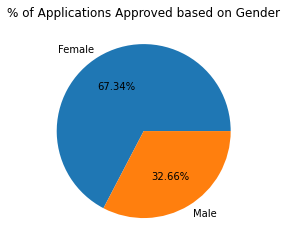

In [64]:
# This graph shows that, majority of application are approved for Female's
plt.pie(final_df[final_df['STATUS']==0]['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications Approved based on Gender')
plt.show()

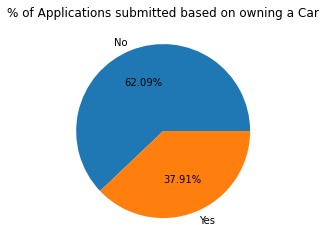

In [65]:
# This graph shows that, majority of applicant's dont own a car
plt.pie(final_df['FLAG_OWN_CAR'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Car')
plt.show()

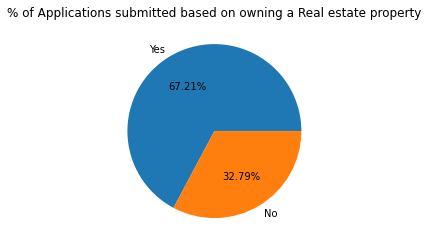

In [66]:
# This graph shows that, majority of applicant's own a Real Estate property / House
plt.pie(final_df['FLAG_OWN_REALTY'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Real estate property')
plt.show()

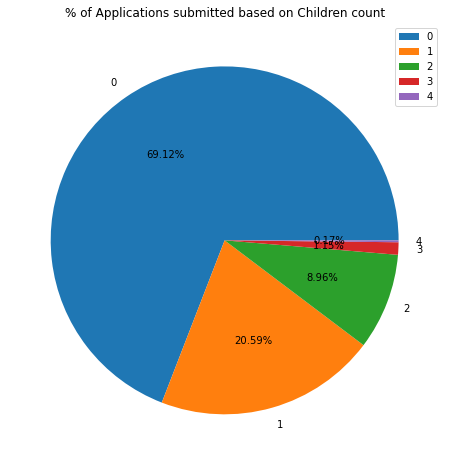

In [67]:
# This graph shows that, majority of applicant's don't have any children
plt.figure(figsize = (8,8))
plt.pie(final_df['CNT_CHILDREN'].value_counts(), labels=final_df['CNT_CHILDREN'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()

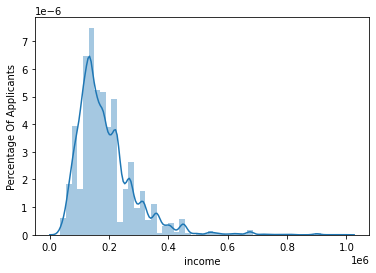

In [68]:
# This graph shows majority of applicant's income 
income_plot = pd.Series(final_df.AMT_INCOME_TOTAL, name="income")
plt.ylabel('Percentage Of Applicants')
sns.distplot(income_plot)
plt.show()


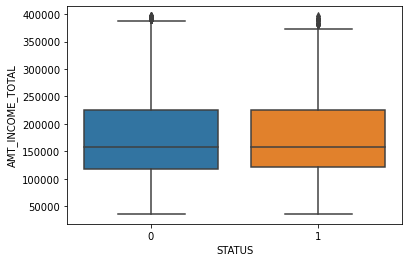

In [69]:
#We can notice that most applicants' income is lower than 40000. So we select these applicants to get box plot.
sns.boxplot(x="STATUS", y="AMT_INCOME_TOTAL", data=final_df[final_df.AMT_INCOME_TOTAL<=400000])
plt.show()

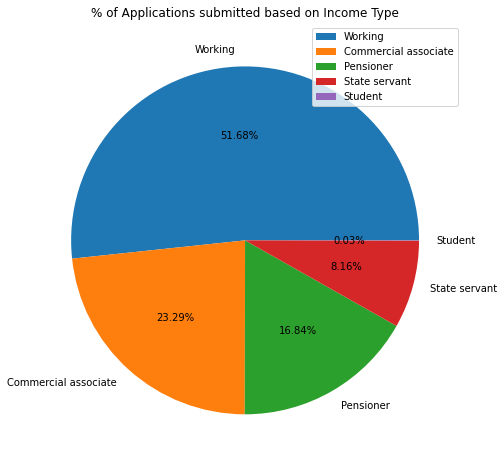

In [70]:
# This graph shows that, majority of applicant's are working professional
plt.figure(figsize = (8,8))
plt.pie(final_df['NAME_INCOME_TYPE'].value_counts(), labels=final_df['NAME_INCOME_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Income Type')
plt.legend()
plt.show()

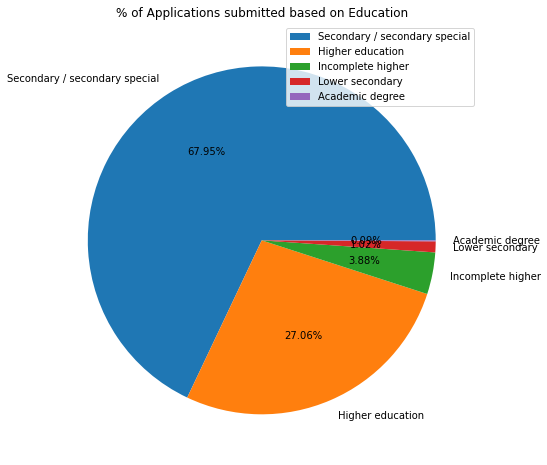

In [71]:
# This graph shows that, majority of applicant's completed the Secondary Education
plt.figure(figsize=(8,8))
plt.pie(final_df['NAME_EDUCATION_TYPE'].value_counts(), labels=final_df['NAME_EDUCATION_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Education')
plt.legend()
plt.show()

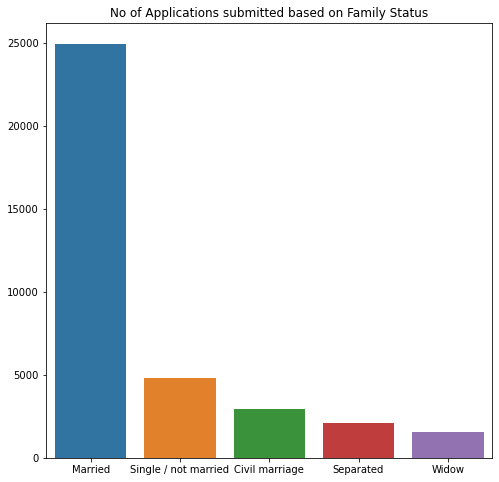

In [72]:
# This graph shows that, majority of applicant's are married
plt.figure(figsize=(8,8))
sns.barplot(final_df['NAME_FAMILY_STATUS'].value_counts().index, final_df['NAME_FAMILY_STATUS'].value_counts().values)
plt.title('No of Applications submitted based on Family Status')
plt.show()

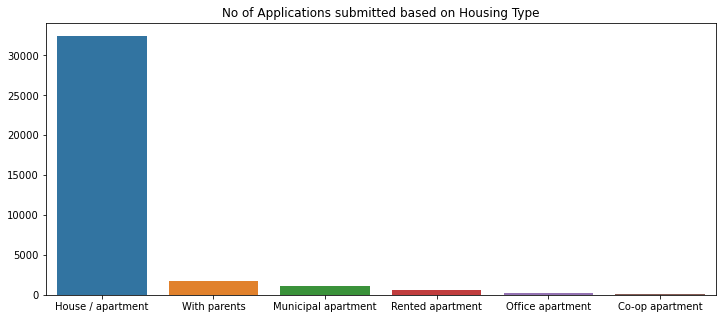

In [73]:
# This graph shows that, majority of applicant's lives in House / Apartment
plt.figure(figsize=(12,5))
sns.barplot(final_df['NAME_HOUSING_TYPE'].value_counts().index, final_df['NAME_HOUSING_TYPE'].value_counts().values)
plt.title('No of Applications submitted based on Housing Type')
plt.show()

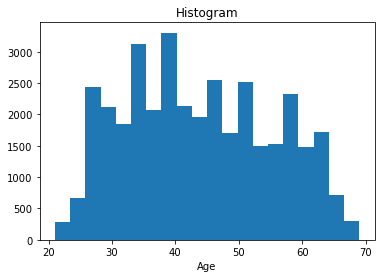

In [74]:
# This graph shows that, majority of applicant's are 25 to 65 years old
plt.hist(final_df['AGE_YEARS'], bins=20)
plt.xlabel('Age')
plt.title('Histogram')
plt.show()

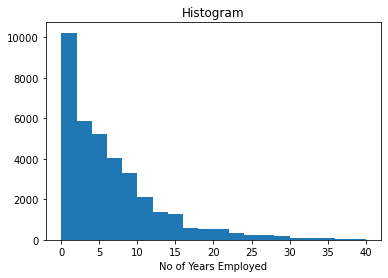

In [75]:
# This graph shows that, majority of applicant's are Employed for 0 to 7 years
plt.hist(final_df['YEARS_EMPLOYED'], bins=20)
plt.xlabel('No of Years Employed')
plt.title('Histogram')
plt.show()

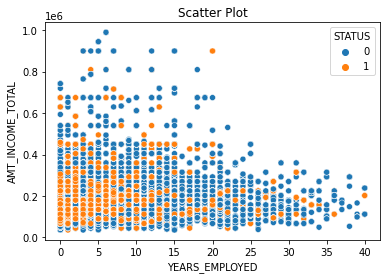

In [76]:
# This graph shows that, majority of applications are rejected if Total income & years of Employment is less
sns.scatterplot(final_df['YEARS_EMPLOYED'], final_df['AMT_INCOME_TOTAL'], hue=final_df['STATUS'])
plt.title('Scatter Plot')
plt.show()

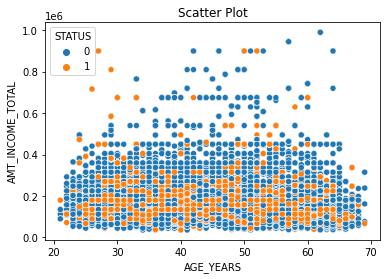

In [77]:
# This graph shows that, majority of applications might be rejected if Total income is less, Age based rejection is equally distributed
sns.scatterplot(final_df['AGE_YEARS'], final_df['AMT_INCOME_TOTAL'], hue=final_df['STATUS'])
plt.title('Scatter Plot')
plt.show()

There are 7 binary features in the dataset Gender, Car, Realty, Mobile, Work_phone, Phone and Email. We find every applicant has a mobile, work phone and email. So we drop these columns Mobile.

# Feature Selection

In [80]:
final_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0


In [81]:
cat_columns = final_df.columns[(final_df.dtypes =='object').values].tolist()
cat_columns

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [82]:
#Converting all Non-Numerical Columns to Numerical
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        final_df[col] = globals()['LE_{}'.format(col)].fit_transform(final_df[col])
final_df.head()    

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,2.0,1
1,5008805,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,2.0,1
2,5008806,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,2.0,0
3,5008808,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0,0
4,5008809,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0,0


In [83]:
for col in cat_columns:
    print(col , "  : ", globals()['LE_{}'.format(col)].classes_)

CODE_GENDER   :  ['F' 'M']
FLAG_OWN_CAR   :  ['N' 'Y']
FLAG_OWN_REALTY   :  ['N' 'Y']
NAME_INCOME_TYPE   :  ['Commercial associate' 'Pensioner' 'State servant' 'Student' 'Working']
NAME_EDUCATION_TYPE   :  ['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
NAME_FAMILY_STATUS   :  ['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Widow']
NAME_HOUSING_TYPE   :  ['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']


In [84]:
final_df.corr()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
ID,1.000000,0.012782,-0.010923,-0.099898,0.026873,-0.019037,0.023753,-0.010707,-0.003589,0.021229,-0.056460,-0.005298,0.024240,0.004663
CODE_GENDER,0.012782,1.000000,0.362094,-0.050535,0.078361,0.204059,0.105449,0.005662,-0.098816,0.070634,-0.202679,-0.029919,0.111307,0.020563
FLAG_OWN_CAR,-0.010923,0.362094,1.000000,-0.014779,0.108250,0.216689,0.055926,-0.100164,-0.123455,0.017069,-0.157385,0.003664,0.154944,-0.010983
FLAG_OWN_REALTY,-0.099898,-0.050535,-0.014779,1.000000,-0.003573,0.033809,-0.047336,0.011301,0.021899,-0.178403,0.130596,-0.035989,-0.007615,-0.027043
CNT_CHILDREN,0.026873,0.078361,0.108250,-0.003573,1.000000,0.033691,0.107570,-0.055582,-0.167775,0.027607,-0.347539,0.048711,0.884277,0.009454
AMT_INCOME_TOTAL,-0.019037,0.204059,0.216689,0.033809,0.033691,1.000000,-0.070153,-0.226431,-0.006435,-0.007724,-0.062982,0.091618,0.025650,0.018997
NAME_INCOME_TYPE,0.023753,0.105449,0.055926,-0.047336,0.107570,-0.070153,1.000000,0.056496,-0.048312,0.036497,-0.213406,0.195455,0.107155,-0.007078
NAME_EDUCATION_TYPE,-0.010707,0.005662,-0.100164,0.011301,-0.055582,-0.226431,0.056496,1.000000,0.009742,-0.036303,0.169358,-0.013560,-0.046496,-0.002247
NAME_FAMILY_STATUS,-0.003589,-0.098816,-0.123455,0.021899,-0.167775,-0.006435,-0.048312,0.009742,1.000000,0.010294,0.106987,-0.054172,-0.559744,0.001293
NAME_HOUSING_TYPE,0.021229,0.070634,0.017069,-0.178403,0.027607,-0.007724,0.036497,-0.036303,0.010294,1.000000,-0.211948,-0.019393,0.006497,0.012522


In [85]:
features = final_df.drop(['STATUS'], axis=1)
label = final_df['STATUS']

In [86]:
features.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0


In [87]:
label.head()

0    1
1    1
2    0
3    0
4    0
Name: STATUS, dtype: int64

# Machine Learning Model

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state = 10)

In [89]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(x_train, y_train)

print('Logistic Model Accuracy : ', log_model.score(x_test, y_test)*100, '%')

prediction = log_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Logistic Model Accuracy :  88.49435728048445 %

Confusion matrix :
[[6430    0]
 [ 836    0]]

Classification report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      6430
           1       0.00      0.00      0.00       836

    accuracy                           0.88      7266
   macro avg       0.44      0.50      0.47      7266
weighted avg       0.78      0.88      0.83      7266



In [90]:
# Decision Tree classification

from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train, y_train)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test, y_test)*100, '%')

prediction = decision_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Decision Tree Model Accuracy :  88.26039086154694 %

Confusion matrix :
[[6330  100]
 [ 753   83]]

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      6430
           1       0.45      0.10      0.16       836

    accuracy                           0.88      7266
   macro avg       0.67      0.54      0.55      7266
weighted avg       0.84      0.88      0.85      7266



In [91]:
# Random Forest classification

from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)

RandomForest_model.fit(x_train, y_train)

print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test, y_test)*100, '%')

prediction = RandomForest_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Random Forest Model Accuracy :  88.49435728048445 %

Confusion matrix :
[[6430    0]
 [ 836    0]]

Classification report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      6430
           1       0.00      0.00      0.00       836

    accuracy                           0.88      7266
   macro avg       0.44      0.50      0.47      7266
weighted avg       0.78      0.88      0.83      7266



In [92]:
# Support Vector Machine classification

from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(x_train, y_train)

print('Support Vector Classifier Accuracy : ', svc_model.score(x_test, y_test)*100, '%')

prediction = svc_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Support Vector Classifier Accuracy :  88.49435728048445 %

Confusion matrix :
[[6430    0]
 [ 836    0]]

Classification report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      6430
           1       0.00      0.00      0.00       836

    accuracy                           0.88      7266
   macro avg       0.44      0.50      0.47      7266
weighted avg       0.78      0.88      0.83      7266



In [93]:
# K Nearest Neighbor classification

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 7)

knn_model.fit(x_train, y_train)

print('KNN Model Accuracy : ', knn_model.score(x_test, y_test)*100, '%')

prediction = knn_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

KNN Model Accuracy :  88.23286540049547 %

Confusion matrix :
[[6271  159]
 [ 696  140]]

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6430
           1       0.47      0.17      0.25       836

    accuracy                           0.88      7266
   macro avg       0.68      0.57      0.59      7266
weighted avg       0.85      0.88      0.86      7266



In [94]:
# XGBoost  classification

from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(x_train, y_train)

print('XGBoost Model Accuracy : ', XGB_model.score(x_test, y_test)*100, '%')

prediction = XGB_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

[10:37:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model Accuracy :  88.76961189099917 %

Confusion matrix :
[[6373   57]
 [ 759   77]]

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      6430
           1       0.57      0.09      0.16       836

    accuracy                           0.89      7266
   macro avg       0.73      0.54      0.55      7266
weighted avg       0.86      0.89      0.85      7266



# Balancing dataset

In [95]:
# scaling all features
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_train_scaled = pd.DataFrame(MMS.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(MMS.transform(x_test), columns=x_test.columns)

In [96]:
# adding samples to minority class using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train_scaled, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test_scaled, y_test)

In [97]:
# Original majority and minority class
y_train.value_counts(normalize=True)*100

0    88.169305
1    11.830695
Name: STATUS, dtype: float64

In [98]:
# after using SMOTE 
y_train_oversam.value_counts(normalize=True)*100

1    50.0
0    50.0
Name: STATUS, dtype: float64

## Machine Learning Model after Balancing

In [99]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(x_train_oversam, y_train_oversam)

print('Logistic Model Accuracy : ', log_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = log_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Logistic Model Accuracy :  52.348367029548996 %

Confusion matrix :
[[3598 2832]
 [3296 3134]]

Classification report:
              precision    recall  f1-score   support

           0       0.52      0.56      0.54      6430
           1       0.53      0.49      0.51      6430

    accuracy                           0.52     12860
   macro avg       0.52      0.52      0.52     12860
weighted avg       0.52      0.52      0.52     12860



In [100]:
# Decision Tree classification

from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train_oversam, y_train_oversam)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = decision_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Decision Tree Model Accuracy :  72.55832037325038 %

Confusion matrix :
[[3928 2502]
 [1027 5403]]

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69      6430
           1       0.68      0.84      0.75      6430

    accuracy                           0.73     12860
   macro avg       0.74      0.73      0.72     12860
weighted avg       0.74      0.73      0.72     12860



In [101]:
# Random Forest classification

from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)

RandomForest_model.fit(x_train_oversam, y_train_oversam)

print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = RandomForest_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Random Forest Model Accuracy :  82.89269051321928 %

Confusion matrix :
[[5531  899]
 [1301 5129]]

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      6430
           1       0.85      0.80      0.82      6430

    accuracy                           0.83     12860
   macro avg       0.83      0.83      0.83     12860
weighted avg       0.83      0.83      0.83     12860



In [102]:
# Support Vector Machine classification

from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(x_train_oversam, y_train_oversam)

print('Support Vector Classifier Accuracy : ', svc_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = svc_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Support Vector Classifier Accuracy :  58.4447900466563 %

Confusion matrix :
[[3612 2818]
 [2526 3904]]

Classification report:
              precision    recall  f1-score   support

           0       0.59      0.56      0.57      6430
           1       0.58      0.61      0.59      6430

    accuracy                           0.58     12860
   macro avg       0.58      0.58      0.58     12860
weighted avg       0.58      0.58      0.58     12860



In [103]:
# K Nearest Neighbor classification

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 7)

knn_model.fit(x_train_oversam, y_train_oversam)

print('KNN Model Accuracy : ', knn_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = knn_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

KNN Model Accuracy :  68.94245723172628 %

Confusion matrix :
[[5066 1364]
 [2630 3800]]

Classification report:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72      6430
           1       0.74      0.59      0.66      6430

    accuracy                           0.69     12860
   macro avg       0.70      0.69      0.69     12860
weighted avg       0.70      0.69      0.69     12860



In [104]:
# XGBoost  classification

from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(x_train_oversam, y_train_oversam)

print('XGBoost Model Accuracy : ', XGB_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = XGB_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

[10:39:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model Accuracy :  90.8398133748056 %

Confusion matrix :
[[6160  270]
 [ 908 5522]]

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6430
           1       0.95      0.86      0.90      6430

    accuracy                           0.91     12860
   macro avg       0.91      0.91      0.91     12860
weighted avg       0.91      0.91      0.91     12860



# Validation

### K-Fold Cross Validation

In [105]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(5)

In [106]:
# Logistic Regression

results=cross_val_score(log_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[88.94852739 90.29593944 88.49277357 89.24982794 84.18444597] 

88.234302862288


In [107]:
# Decision Tree classification

results=cross_val_score(decision_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[13.23974677 57.56366139 63.39986235 82.07845836 78.77494838] 

59.011335450880495


In [108]:
# Random Forest classification

results=cross_val_score(RandomForest_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[13.32232315 90.29593944 88.49277357 89.24982794 84.18444597] 

73.10906201450382


In [109]:
# Support Vector Machine classification

results=cross_val_score(svc_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[88.94852739 90.29593944 88.49277357 89.24982794 84.18444597] 

88.234302862288


In [110]:
# K Nearest Neighbor classification

results=cross_val_score(knn_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[43.76548307 56.95801789 79.65588438 76.91672402 80.06882312] 

67.47298649736899


In [111]:
# XGBoost classification

results=cross_val_score(XGB_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[10:40:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

# Conclusion